In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os 

df_all = pd.DataFrame()
for file in os.listdir('C:\\Users\\Crabsi\\Desktop\\QDS MASTER\\WS2526 01\\Data Literacy\\Project\\fahrradzaehler\\data'):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join('C:\\Users\\Crabsi\\Desktop\\QDS MASTER\\WS2526 01\\Data Literacy\\Project\\fahrradzaehler\\data', file))
        df_all = pd.concat([df_all, df], ignore_index=True)



C:\Users\Crabsi\AppData\Local\Temp\ipykernel_8876\4181778888.py:10: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join('C:\\Users\\Crabsi\\Desktop\\QDS MASTER\\WS2526 01\\Data Literacy\\Project\\fahrradzaehler\\data', file))
C:\Users\Crabsi\AppData\Local\Temp\ipykernel_8876\4181778888.py:10: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join('C:\\Users\\Crabsi\\Desktop\\QDS MASTER\\WS2526 01\\Data Literacy\\Project\\fahrradzaehler\\data', file))
C:\Users\Crabsi\AppData\Local\Temp\ipykernel_8876\4181778888.py:10: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join('C:\\Users\\Crabsi\\Desktop\\QDS MASTER\\WS2526 01\\Data Literacy\\Project\\fahrradzaehler\\data', file))
C:\Users\Crabsi\AppData\Local\Temp\ipykernel_8876\4181778888.py:10: Dt

In [10]:
df_all.head()
len(df_all)

df_all['iso_timestamp'] = pd.to_datetime(df_all['iso_timestamp'], utc=True, format='mixed')
df_all.to_csv("df_all.csv", index=False)

In [3]:
print(df_all.dtypes)
numeric_cols = [
    "channels_in", "channels_out", "channels_unknown", "channels_all", 
    "site_temperature", "site_rain_accumulation", "site_snow_accumulation"]

df_all[numeric_cols] = df_all[numeric_cols].apply(pd.to_numeric, errors='coerce')

operator_name                          object
domain_name                            object
domain_id                               int64
counter_site                           object
counter_site_id                         int64
counter_serial                         object
longitude                             float64
latitude                              float64
timezone                               object
iso_timestamp             datetime64[ns, UTC]
channels_in                            object
channels_out                           object
channels_unknown                       object
channels_all                            int64
site_temperature                       object
site_rain_accumulation                 object
site_snow_accumulation                 object
dtype: object


In [4]:
df_all["day"] = df_all['iso_timestamp'].dt.date
df_daily = df_all.groupby([df_all["counter_site"], df_all["day"]], as_index=False, sort=False).agg({
    "domain_name": "first",
    "channels_in": "sum",
    "channels_out": "sum",
    "channels_unknown": "sum",
    "channels_all": "sum",
    "site_temperature": "mean",
    "site_rain_accumulation": "mean",
    "site_snow_accumulation": "mean"

})

In [5]:
df_daily
df_daily.to_csv('fahrradzaehler_daily.csv', index=False)

In [6]:
df_daily["loc"] = df_daily["domain_name"] + " " + df_daily["counter_site"]
df_daily.sort_values(by=["day", "loc"], inplace=True)
df_daily

,counter_site,day,domain_name,channels_in,channels_out,channels_unknown,channels_all,site_temperature,site_rain_accumulation,site_snow_accumulation,loc
64,König-Karls-Brücke Barometer,2012-12-31,Landeshauptstadt Stuttgart,0.0,1.0,0.0,1,3.000,0.000,NaN,Landeshauptstadt Stuttgart König-Karls-Brücke ...
32,Wiwilibrücke,2012-12-31,Stadt Freiburg,0.0,0.0,51.0,51,NaN,NaN,NaN,Stadt Freiburg Wiwilibrücke
0,Erbprinzenstraße,2012-12-31,Stadt Karlsruhe,9.0,10.0,0.0,19,5.000,0.000,NaN,Stadt Karlsruhe Erbprinzenstraße
65,König-Karls-Brücke Barometer,2013-01-01,Landeshauptstadt Stuttgart,146.0,177.0,0.0,323,3.875,0.625,NaN,Landeshauptstadt Stuttgart König-Karls-Brücke ...
33,Wiwilibrücke,2013-01-01,Stadt Freiburg,0.0,0.0,1364.0,1364,NaN,NaN,NaN,Stadt Freiburg Wiwilibrücke
...,...,...,...,...,...,...,...,...,...,...,...
254966,Radbrücke Mitte - Wöhrdstraße,2025-10-31,Stadt Tübingen,3.0,14.0,0.0,17,NaN,NaN,NaN,Stadt Tübingen Radbrücke Mitte - Wöhrdstraße
255336,Radbrücke Ost,2025-10-31,Stadt Tübingen,0.0,3.0,0.0,3,NaN,NaN,NaN,Stadt Tübingen Radbrücke Ost
252074,Unterführung Steinlach/Karlstraße Südseite - S...,2025-10-31,Stadt Tübingen,0.0,0.0,0.0,0,NaN,NaN,NaN,Stadt Tübingen Unterführung Steinlach/Karlstra...
253354,Blautal Lupferbrücke,2025-10-31,Stadt Ulm,0.0,0.0,0.0,0,7.000,0.000,NaN,Stadt Ulm Blautal Lupferbrücke


In [7]:
channels = df_daily[["channels_in", "channels_out", "channels_unknown"]]


dailybike_plot =df_daily.melt(
    id_vars=["day", "loc"], 
    value_vars=channels, 
    var_name="channel", 
    value_name="daily_bikers")

loc_order = sorted(dailybike_plot["loc"].unique())
dailybike_plot["loc"] = pd.Categorical(
    dailybike_plot["loc"], 
    categories=loc_order, 
    ordered=True)

C:\Users\Crabsi\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


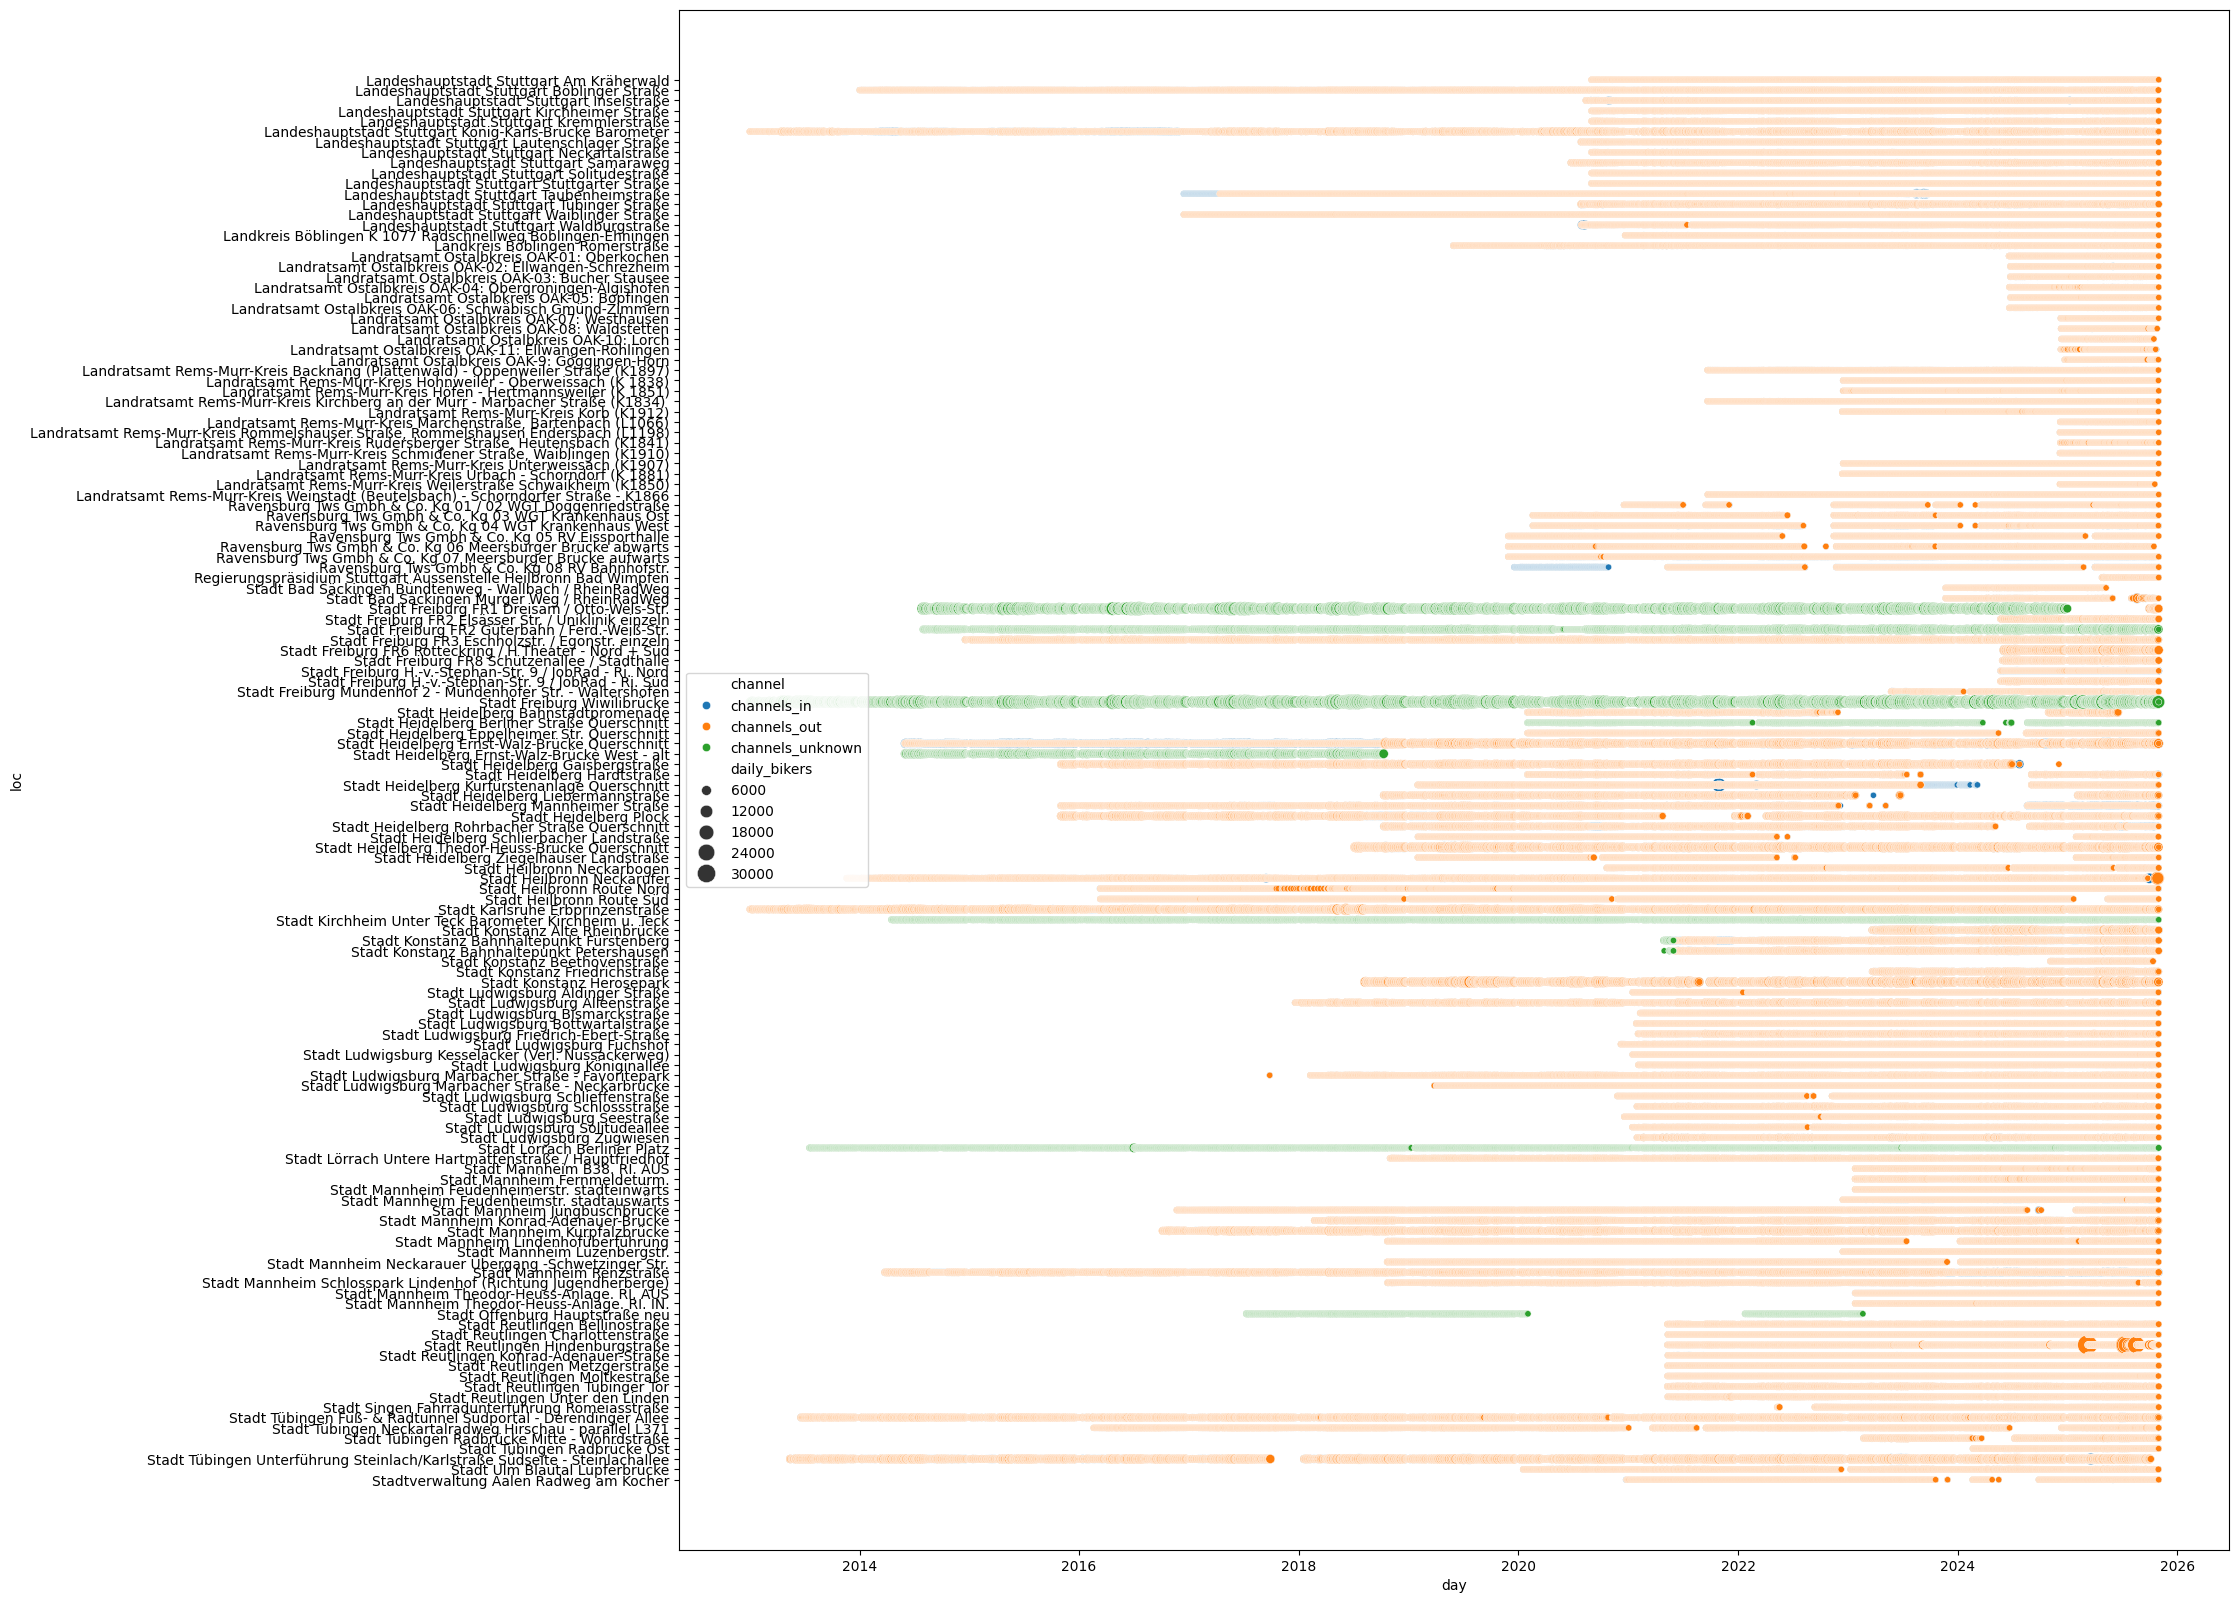

In [8]:
plt.figure(figsize=(20,20))
sns.scatterplot(
    data=dailybike_plot[dailybike_plot['daily_bikers'] > 0],
    x="day",
    y="loc",
    hue="channel",
    size="daily_bikers",
    sizes=(20, 200)
    
)
plt.show()